In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request


In [2]:

# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))


Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_gk = pd.read_csv('final_gk.csv')
gk_pas_2024=pd.read_csv('gk_pas_2024.csv')
gk_pas_2023=pd.read_csv('gk_pas_2023.csv')
gk_pas_2022=pd.read_csv('gk_pas_2022.csv')
gk_pas_2021=pd.read_csv('gk_pas_2021.csv')
newbie=pd.read_csv('newbie.csv')
# Fill missing values with 0 in place
final_gk.fillna(0, inplace=True)
gk_pas_2023.fillna(0, inplace=True)
gk_pas_2022.fillna(0, inplace=True)
gk_pas_2021.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Juan Musso,ar ARG,GK,Atalanta+Udinese,it Serie A,29.0,1994.0,103.0,103.0,9146.0,101.7,132.0,1.30,391.0,265.0,68.0,44.0,23.0,36.0,29.0,28.0,21.0,20.0,0.0,1.0,0.0,2.0,9.0,6.0,120.0,0.31,-6.0,-0.06,461.0,1124.0,41.0,2350.0,563.0,31.0,31.480,689.0,57.0,45.40,1155.0,78.0,7.0,97.0,0.95,62.10,390.0,727.0,2275.0,2405.0,75.0,63411.0,44761.0,415.0,415.0,100.0,1076.0,1093.0,98.0,763.0,1505.0,51.0,0.0,0.1,0.0,-0.1,1.0,20.0,0.0,0.0,0.0,0.0,5.0,0.05,0.00,2774.0,3230.0,25.0,3253.0,1873.0,1359.0,27.28,31.76,0.25,31.99,18.42,13.36,4.0,0.0,0.0,4.0,0.0,0.0,0.00
1,1,Alisson,br BRA,GK,Liverpool,eng Premier League,30.0,1992.0,134.0,134.0,12060.0,134.0,129.0,0.96,470.0,343.0,73.0,80.0,32.0,22.0,52.0,39.0,13.0,7.0,2.0,4.0,15.0,1.0,11.0,4.0,139.2,0.30,14.2,0.11,364.0,918.0,40.0,4473.0,726.0,16.0,25.900,654.0,29.0,32.10,1377.0,78.0,6.0,298.0,2.22,74.80,192.0,720.0,4440.0,5125.0,86.0,101510.0,64152.0,1043.0,1049.0,99.0,2518.0,2562.0,98.0,860.0,1492.0,58.0,0.0,0.5,0.0,1.5,3.0,44.0,2.0,0.0,10.0,4.0,18.0,0.13,0.00,3851.0,5319.0,124.0,5440.0,3417.0,3170.0,28.74,39.69,0.93,40.60,25.50,23.66,4.0,4.0,0.0,0.0,0.0,0.0,0.03
2,2,Koen Casteels,be BEL,GK,Wolfsburg,de Bundesliga,31.0,1992.0,119.0,119.0,10710.0,119.0,160.0,1.34,488.0,329.0,67.0,49.0,31.0,39.0,40.0,34.0,21.0,12.0,5.0,4.0,24.0,1.0,13.0,6.0,155.0,0.32,1.0,0.01,774.0,1810.0,43.0,4033.0,602.0,33.0,33.400,826.0,58.0,46.60,1687.0,110.0,7.0,176.0,1.48,64.30,482.0,1327.0,3702.0,4562.0,76.0,108943.0,75476.0,558.0,561.0,99.0,1715.0,1737.0,99.0,1422.0,2550.0,56.0,0.0,0.9,0.3,0.1,2.0,96.0,0.0,0.0,4.0,5.0,21.0,0.18,0.00,3935.0,5069.0,47.0,5111.0,3099.0,2732.0,33.07,42.60,0.39,42.95,26.04,22.96,4.0,0.0,0.0,0.0,0.0,4.0,0.04
3,3,Álex Remiro,es ESP,GK,Real Sociedad,es La Liga,28.0,1995.0,148.0,148.0,13265.0,147.4,141.0,0.96,480.0,339.0,71.0,69.0,42.0,37.0,63.0,43.0,18.0,13.0,4.0,1.0,22.0,2.0,17.0,4.0,137.1,0.29,0.1,0.00,825.0,1998.0,41.0,4193.0,506.0,35.0,33.980,837.0,62.0,49.25,1716.0,63.0,4.0,196.0,1.33,66.50,517.0,1477.0,3727.0,5088.0,74.0,107418.0,78401.0,626.0,630.0,99.0,1785.0,1822.0,98.0,1313.0,2574.0,51.0,0.0,0.0,0.3,0.0,2.0,75.0,0.0,0.0,3.0,0.0,19.0,0.13,0.00,4593.0,5307.0,42.0,5349.0,2978.0,2598.0,31.16,36.00,0.28,36.29,20.20,17.63,4.0,0.0,4.0,0.0,0.0,0.0,0.00
4,4,Marco Silvestri,it ITA,GK,Udinese+Hellas Verona,it Serie A,32.0,1991.0,124.0,124.0,11160.0,124.0,168.0,1.35,477.0,314.0,66.0,33.0,47.0,44.0,28.0,23.0,27.0,23.0,0.0,4.0,0.0,3.0,15.0,5.0,156.5,0.33,-6.5,

In [4]:
final_gk.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Goals_Against', 'Goals_Against_per90',
       'Shots_on_Target_Against', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%',
       'PK_attempts', 'PK_Allowed', 'PKs_Saved', 'PK_missed',
       'Save%(Penalty Kicks)', 'Gk_free_kick_goals_against',
       'Gk_corner_kick_goals_against', 'Gk_own_goals_against', 'Gk_psxg',
       'Gk_psxg_per_shot_on_target_against', 'Gk_psxg_diff',
       'Gk_psxg_net_per90', 'Gk_passes_completed_launched',
       'Gk_passes_attempted_launched', 'Gk_passes_pct_launched', 'Gk_passes',
       'Gk_passes_throws', 'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
       'Gk_go

In [5]:
final_gk = final_gk[final_gk['90s'] >= 19]
final_gk = final_gk.reset_index(drop=True)
final_gk

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
0,0,Juan Musso,ar ARG,GK,Atalanta+Udinese,it Serie A,29.0,1994.0,103.0,103.0,9146.0,101.7,132.0,1.30,391.0,265.0,68.0,44.0,23.0,36.0,29.0,28.0,21.0,20.0,0.0,1.0,0.0,2.0,9.0,6.0,120.0,0.31,-6.0,-0.06,461.0,1124.0,41.0,2350.0,563.0,31.0,31.480,689.0,57.0,45.40,1155.0,78.0,7.0,97.0,0.95,62.10,390.0,727.0,2275.0,2405.0,75.0,63411.0,44761.0,415.0,415.0,100.0,1076.0,1093.0,98.0,763.0,1505.0,51.0,0.0,0.1,0.0,-0.1,1.0,20.0,0.0,0.0,0.0,0.0,5.0,0.05,0.00,2774.0,3230.0,25.0,3253.0,1873.0,1359.0,27.28,31.76,0.25,31.99,18.42,13.36,4.0,0.0,0.0,4.0,0.0,0.0,0.00
1,1,Alisson,br BRA,GK,Liverpool,eng Premier League,30.0,1992.0,134.0,134.0,12060.0,134.0,129.0,0.96,470.0,343.0,73.0,80.0,32.0,22.0,52.0,39.0,13.0,7.0,2.0,4.0,15.0,1.0,11.0,4.0,139.2,0.30,14.2,0.11,364.0,918.0,40.0,4473.0,726.0,16.0,25.900,654.0,29.0,32.10,1377.0,78.0,6.0,298.0,2.22,74.80,192.0,720.0,4440.0,5125.0,86.0,101510.0,64152.0,1043.0,1049.0,99.0,2518.0,2562.0,98.0,860.0,1492.0,58.0,0.0,0.5,0.0,1.5,3.0,44.0,2.0,0.0,10.0,4.0,18.0,0.13,0.00,3851.0,5319.0,124.0,5440.0,3417.0,3170.0,28.74,39.69,0.93,40.60,25.50,23.66,4.0,4.0,0.0,0.0,0.0,0.0,0.03
2,2,Koen Casteels,be BEL,GK,Wolfsburg,de Bundesliga,31.0,1992.0,119.0,119.0,10710.0,119.0,160.0,1.34,488.0,329.0,67.0,49.0,31.0,39.0,40.0,34.0,21.0,12.0,5.0,4.0,24.0,1.0,13.0,6.0,155.0,0.32,1.0,0.01,774.0,1810.0,43.0,4033.0,602.0,33.0,33.400,826.0,58.0,46.60,1687.0,110.0,7.0,176.0,1.48,64.30,482.0,1327.0,3702.0,4562.0,76.0,108943.0,75476.0,558.0,561.0,99.0,1715.0,1737.0,99.0,1422.0,2550.0,56.0,0.0,0.9,0.3,0.1,2.0,96.0,0.0,0.0,4.0,5.0,21.0,0.18,0.00,3935.0,5069.0,47.0,5111.0,3099.0,2732.0,33.07,42.60,0.39,42.95,26.04,22.96,4.0,0.0,0.0,0.0,0.0,4.0,0.04
3,3,Álex Remiro,es ESP,GK,Real Sociedad,es La Liga,28.0,1995.0,148.0,148.0,13265.0,147.4,141.0,0.96,480.0,339.0,71.0,69.0,42.0,37.0,63.0,43.0,18.0,13.0,4.0,1.0,22.0,2.0,17.0,4.0,137.1,0.29,0.1,0.00,825.0,1998.0,41.0,4193.0,506.0,35.0,33.980,837.0,62.0,49.25,1716.0,63.0,4.0,196.0,1.33,66.50,517.0,1477.0,3727.0,5088.0,74.0,107418.0,78401.0,626.0,630.0,99.0,1785.0,1822.0,98.0,1313.0,2574.0,51.0,0.0,0.0,0.3,0.0,2.0,75.0,0.0,0.0,3.0,0.0,19.0,0.13,0.00,4593.0,5307.0,42.0,5349.0,2978.0,2598.0,31.16,36.00,0.28,36.29,20.20,17.63,4.0,0.0,4.0,0.0,0.0,0.0,0.00
4,4,Marco Silvestri,it ITA,GK,Udinese+Hellas Verona,it Serie A,32.0,1991.0,124.0,124.0,11160.0,124.0,168.0,1.35,477.0,314.0,66.0,33.0,47.0,44.0,28.0,23.0,27.0,23.0,0.0,4.0,0.0,3.0,15.0,5.0,156.5,0.33,-6.5,

In [6]:
Ederson=final_gk[final_gk['Player']=='Ederson']
Ederson

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_Against,Goals_Against_per90,Shots_on_Target_Against,Saves,Save%,W,D,L,CS,CS%,PK_attempts,PK_Allowed,PKs_Saved,PK_missed,Save%(Penalty Kicks),Gk_free_kick_goals_against,Gk_corner_kick_goals_against,Gk_own_goals_against,Gk_psxg,Gk_psxg_per_shot_on_target_against,Gk_psxg_diff,Gk_psxg_net_per90,Gk_passes_completed_launched,Gk_passes_attempted_launched,Gk_passes_pct_launched,Gk_passes,Gk_passes_throws,Gk_pct_passes_launched,Gk_passes_length_avg,Gk_goal_kicks,Gk_pct_goal_kicks_launched,Gk_goal_kick_length_avg,Gk_crosses_faced,Gk_crosses_stopped,Gk_crosses_stopped_pct,Gk_def_actions_outside_pen_area,Gk_def_actions_outside_pen_area_per90,Gk_avg_distance_def_actions,Gk_goal_kicks_launched,Gk_passes_launched,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists,xAG,xA,A-xAG,Key_Passes,Passes_1/3,Passes_Penalty_Area,Crosses_Penalty_Area,Progressive_Passes,Goal_Creating_Action,Shot_Creating_Action,Shot_Creating_Action_per90,Goal_Creating_Action_90,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Tocuhes_Live_Balls,Carries,Passes_Received,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Tocuhes_Live_Balls_per_90,Carries_per_90,Passes_Received_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,Goal_Creating_Action_per90
26,26,Ederson,br BRA,GK,Manchester City,eng Premier League,29.0,1993.0,141.0,141.0,12505.0,138.9,113.0,0.81,335.0,224.0,67.0,103.0,21.0,17.0,60.0,43.0,15.0,14.0,1.0,0.0,7.0,1.0,9.0,3.0,107.7,0.32,-2.3,-0.02,426.0,957.0,45.0,4179.0,610.0,19.0,27.33,557.0,32.0,33.67,1142.0,84.0,7.0,182.0,1.31,68.6,181.0,774.0,4111.0,4853.0,87.0,97934.0,64806.0,972.0,976.0,100.0,2173.0,2205.0,99.0,949.0,1529.0,62.0,0.0,0.6,0.5,1.4,3.0,54.0,4.0,0.0,8.0,4.0,12.0,0.09,0.0,3868.0,4886.0,44.0,4928.0,3266.0,3058.0,27.85,35.18,0.32,35.48,23.51,22.02,4.0,4.0,0.0,0.0,0.0,0.0,0.03


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['Goals_Against', 'Goals_Against_per90',
        'Saves', 'Save%','Gk_free_kick_goals_against','Gk_corner_kick_goals_against', 
        'Gk_own_goals_against', 'Gk_psxg_diff','Gk_psxg_net_per90', 
        'Gk_passes_completed_launched','Gk_passes_attempted_launched',
        'Gk_passes_pct_launched', 'Gk_passes','Gk_passes_throws',
        'Gk_pct_passes_launched', 'Gk_passes_length_avg',
       'Gk_goal_kicks', 'Gk_pct_goal_kicks_launched',
       'Gk_goal_kick_length_avg', 'Gk_crosses_faced', 'Gk_crosses_stopped',
       'Gk_crosses_stopped_pct', 'Gk_def_actions_outside_pen_area',
       'Gk_def_actions_outside_pen_area_per90', 'Gk_avg_distance_def_actions',
        'Passes_Total_Cmp','Passes_Total_Att', 'Passes_Total_Cmp%', 
        'Passes_TotDist','Passes_PrgDist', 'Passes_Short_Cmp', 
        'Passes_Short_Att','Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att','Passes_Medium_Cmp%', 'Passes_Long_Cmp', 
        'Passes_Long_Att','Passes_Long_Cmp%',  'Passes_1/3',
        'Shot_Creating_Action_per90', 'Goal_Creating_Action_per90',
        'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Tocuhes_Live_Balls_per_90', 
        'Carries_per_90','Passes_Received_per_90']

# Step 1: Standardize the data
scaler = StandardScaler()
final_gk = final_gk[~(final_gk['Player'] == 'Ederson')]
final_gk_scaled = scaler.fit_transform(final_gk[relevant_columns])
Ederson_scaled = scaler.transform(Ederson[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Ederson[relevant_columns], final_gk[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(Ederson_scaled, final_gk_scaled.T)
magnitude_onana = np.linalg.norm(Ederson_scaled, axis=1, keepdims=True)
magnitude_final_gk = np.linalg.norm(final_gk_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_onana * magnitude_final_gk.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': final_gk['Player'], 'Similarity': cosine_similarity_signed[0],'League':final_gk['Comp'],'Squad':final_gk['Squad'],'Age':final_gk['Age'],'Seasons at top 5': final_gk['Seasons at top 5'],'Seasons in PL': final_gk['Seasons in PL'] ,'Seasons in Liga':final_gk['Seasons in Liga'],'Seasons in Serie A':final_gk['Seasons in Serie A'],'Seasons in Ligue 1': final_gk['Seasons in Ligue 1'],'Seasons in Bundesliga':final_gk['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Onana
most_similar_goalkeepers = similarity_df.head(10)

# Goalkeepers least similar to Onana
least_similar_goalkeepers = similarity_df.tail(10)

# Now you have the most similar and least similar goalkeepers to Onana based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.
most_similar_goalkeepers

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Marc-André ter Stegen,0.869869,es La Liga,Barcelona,31.0,4.0,0.0,4.0,0.0,0.0,0.0
1,Alisson,0.850884,eng Premier League,Liverpool,30.0,4.0,4.0,0.0,0.0,0.0,0.0
2,Mike Maignan,0.812185,it Serie A+fr Ligue 1,Milan+Lille,28.0,4.0,0.0,0.0,3.0,1.0,0.0
3,Yann Sommer,0.799767,it Serie A+de Bundesliga,Inter+Bayern Munich+M'Gladbach+M'Gladbach,34.0,4.0,0.0,0.0,1.0,0.0,3.0
4,Gregor Kobel,0.751472,de Bundesliga,Dortmund+Stuttgart,25.0,4.0,0.0,0.0,0.0,0.0,4.0
5,Wojciech Szczęsny,0.748610,it Serie A,Juventus,33.0,4.0,0.0,0.0,4.0,0.0,0.0
6,Pau López,0.742948,fr Ligue 1+it Serie A,Marseille+Roma,28.0,4.0,0.0,0.0,1.0,3.0,0.0
7,Manuel Neuer,0.739235,de Bundesliga,Bayern Munich,37.0,4.0,0.0,0.0,0.0,0.0,4.0
8,Lukáš Hrádecký,0.727793,de Bundesliga,Leverkusen,33.0,4.0,0.0,0.0,0.0,0.0,4.0
9,Koen Casteels,0.662558,de Bundesliga,Wolfsburg,31.0,4.0,0.0,0.0,0.0,0.0,4.0


In [8]:
least_similar_goalkeepers

,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
93,Guillermo Ochoa,-0.627652,it Serie A,Salernitana,38.0,2.0,0.0,0.0,2.0,0.0,0.0
94,Sam Johnstone,-0.635309,eng Premier League,Crystal Palace,30.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Marko Dmitrović,-0.658641,es La Liga,Sevilla,31.0,2.0,0.0,2.0,0.0,0.0,0.0
96,Luís Maximiano,-0.672875,es La Liga,Almería,24.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Thomas Kaminski,-0.672919,eng Premier League,Luton Town,30.0,0.0,0.0,0.0,0.0,0.0,0.0
98,Dean Henderson,-0.673578,eng Premier League,Crystal Palace+Nott'ham Forest,26.0,2.0,2.0,0.0,0.0,0.0,0.0
99,Neto,-0.680773,eng Premier League,Bournemouth,34.0,2.0,2.0,0.0,0.0,0.0,0.0
100,Wladimiro Falcone,-0.681394,it Serie A,Lecce,28.0,2.0,0.0,0.0,2.0,0.0,0.0
101,Wes Foderingham,-0.754963,eng Premier League,Sheffield Utd,32.0,0.0,0.0,0.0,0.0,0.0,0.0
102,Alexandre Oukidja,-0.768317,fr Ligue 1,Metz,35.0,0.0,0.0,0.0,0.0,0.0,0.0


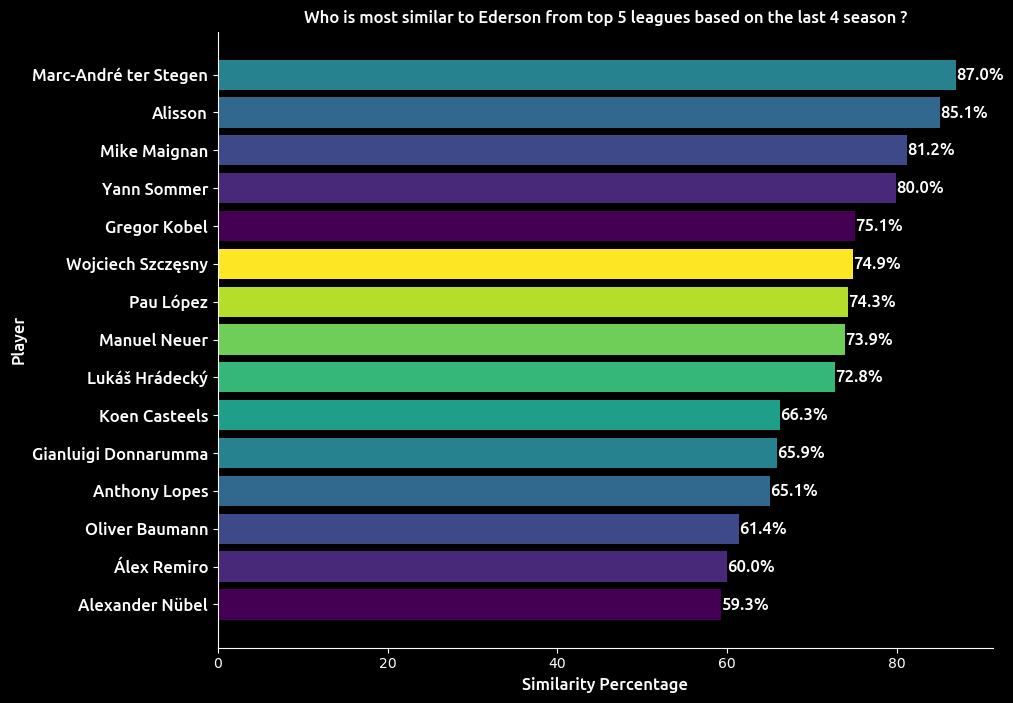

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_rice in descending order
similarity_df_sorted = similarity_df.sort_values(by='Similarity', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(similarity_df_sorted['Player'].head(15)[::-1], (similarity_df_sorted['Similarity'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Ederson from top 5 leagues based on the last 4 season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(similarity_df['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_Ederson.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
